In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [87]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000, centers=3, n_features=2, random_state=1)

In [88]:
# usl>> we will not be using y

In [89]:
X.shape

(1000, 2)

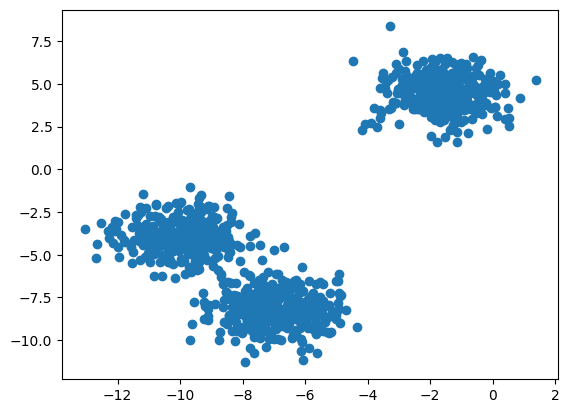

In [90]:
plt.scatter(X[:,0], X[:,1])

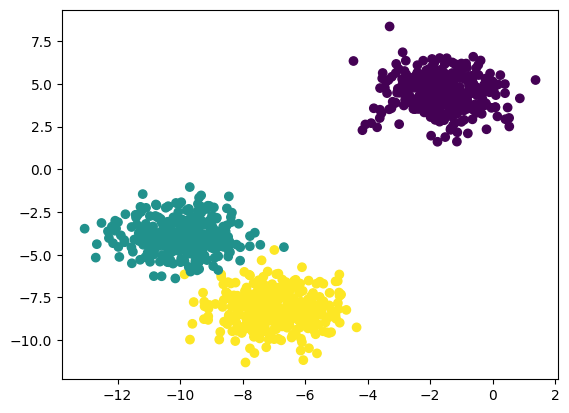

In [91]:
plt.scatter(X[:,0], X[:,1], c=y)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=1)

In [93]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [94]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, init='k-means++')

# n_clustersint, default=8
# init{‘k-means++’, ‘random’}  default=’k-means++’

In [95]:
kmeans

KMeans(n_clusters=3)

In [96]:
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [97]:
y_labels=kmeans.predict(X_train)

# kmeans.fit_predict(X_train) can also use direct

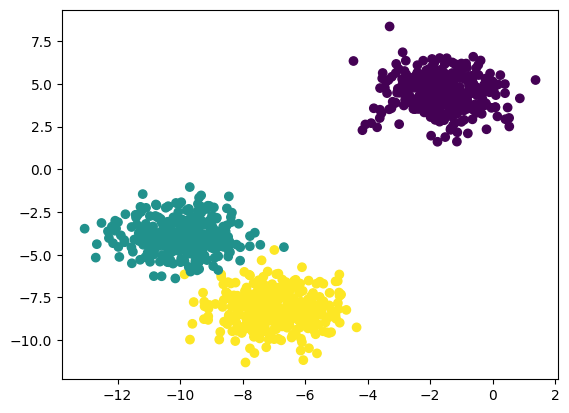

In [98]:
plt.scatter(X[:,0], X[:,1], c=y)   # y is actual y  for whole data

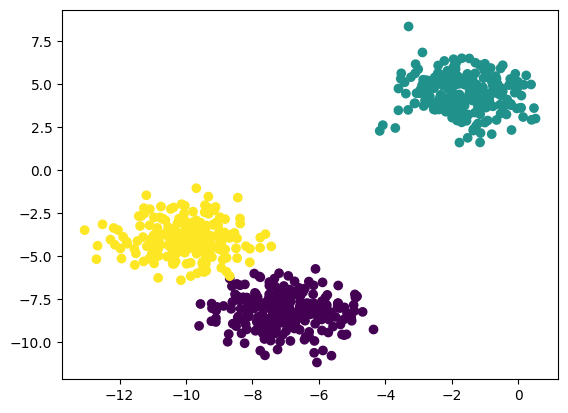

In [99]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)

# y label is predicted on train data

In [101]:
# how better this clustering model is: 

from sklearn.metrics import silhouette_score
silhouette_score(X_train, y_labels)  # close to 1 >> we have better model

# y_labels=kmeans.labels_   >>same

0.7179451230427786

In [102]:
kmeans.labels_

array([1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0,
       1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0,
       1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1,

###  how to selcet optimal k(centroid) valuse:>> elbow method 


In [103]:
kmeans.inertia_   # wcss for k=3

1405.6800517849392

In [104]:

wcss=[]

for k in range(1,10): 
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [105]:
wcss   # wcss is decreasing: 

[29004.511743610456,
 4501.242392684224,
 1405.6800517849392,
 1237.7652802763105,
 1044.263661335388,
 940.8600471829291,
 833.7007570574532,
 730.3178375448174,
 657.2783219583033]

<function matplotlib.pyplot.show(close=None, block=None)>

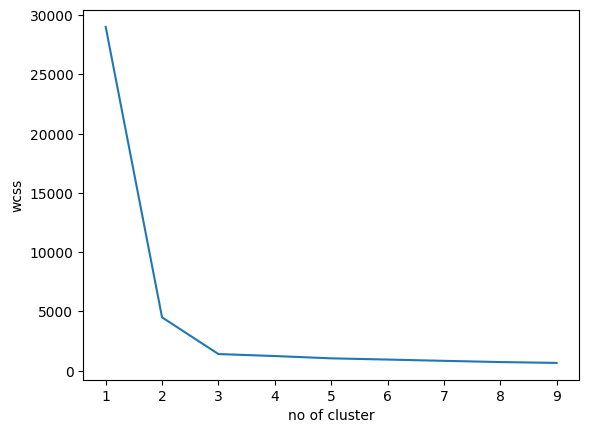

In [106]:
# plot elbow curve

plt.plot(range(1,10), wcss)
plt.xticks(range(1,10))
plt.xlabel('no of cluster')
plt.ylabel('wcss')
plt.show

In [107]:
# based on the plot above thye optimal number of k(centroid) should be 3

In [108]:
!pip install kneed


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\91830\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [109]:
from kneed import KneeLocator
k1=KneeLocator(range(1,10), wcss, curve='convex', direction='decreasing')

In [110]:
k1.elbow  # revarify with image

2

In [111]:
silhouette_coeff=[]
for k in range(2,10): 
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_train)
    score=silhouette_score(X_train, kmeans.labels_)
    silhouette_coeff.append(score)

In [112]:
silhouette_coeff

[0.7674998364431159,
 0.7179451230427786,
 0.5994659540073699,
 0.42356065881352867,
 0.42233577326530103,
 0.337332307525007,
 0.3415222312154116,
 0.33130267983894346]

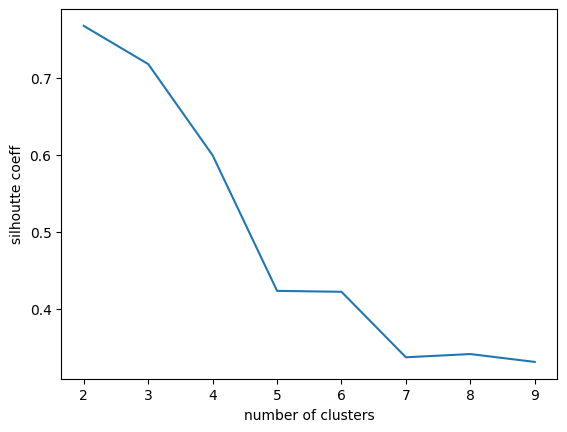

In [113]:
plt.plot(range(2,10), silhouette_coeff)
plt.xticks(range(2,10))
plt.xlabel('number of clusters')
plt.ylabel('silhoutte coeff')
plt.show()

In [114]:
# k=2 is our optimal numbero of k(varified silhouette score and kneed after elbow )